## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [102]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import lag_plot
#plt.rcParams.update({'figure.figsize':(8,4),'figure.dpi':200})

import itertools
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
import os

In [103]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Projects\\Capstone Project\\SBI Stocks'

<a id='load_data'></a>
# 2. Load Data

In [104]:
df=pd.read_csv('SBI_Historical_Data.csv',parse_dates=['Date'])
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...,...
1380,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%
1381,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
1382,2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%
1383,2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%


 <a id='data_preparation'></a>
 # 2.Data Preparatiopn

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Converting date into standard format<br> 
                        4. Check for missing values<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [105]:
df.shape

(1385, 7)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [106]:
# numerical features
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [107]:
#categorical features
df.describe(include=object)

,Vol.,Change %
count,1385,1385
unique,1147,638
top,9.08M,-0.02%
freq,4,13


<a id='check_data_type'></a>
## 3.3 Checking Datatype and Missing Values 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


we drop the unnecessary columns and then checking null values

In [109]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [110]:
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'],axis=1,inplace=True)
df

,Date,Price
0,2020-08-07,190.65
1,2020-08-06,190.95
2,2020-08-05,191.45
3,2020-08-04,191.60
4,2020-08-03,192.25
...,...,...
1380,2015-01-07,300.15
1381,2015-01-06,299.90
1382,2015-01-05,312.75
1383,2015-01-02,315.25


#### Checking nulls

In [111]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [112]:
df.duplicated().sum()

0

#### Checking the stock time stamp

In [113]:
df.Date.min(),df.Date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

In [114]:
len(df.Date.unique())

1385

In [115]:
df=df.sort_values('Date',ignore_index=True)
df

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15
...,...,...
1380,2020-08-03,192.25
1381,2020-08-04,191.60
1382,2020-08-05,191.45
1383,2020-08-06,190.95


<a id='check_data_type'></a>
## 3.4 Indexing with Date 

In [116]:
#Average Daily Sales
sbi=df.pivot_table(values='Price',index='Date')
sbi

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15
...,...
2020-08-03,192.25
2020-08-04,191.60
2020-08-05,191.45


<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we analysis Time series data to do so we need to perform following steps <br><br>
                        1. Visualizing Data <br>
                        2. Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

<AxesSubplot:xlabel='Date'>

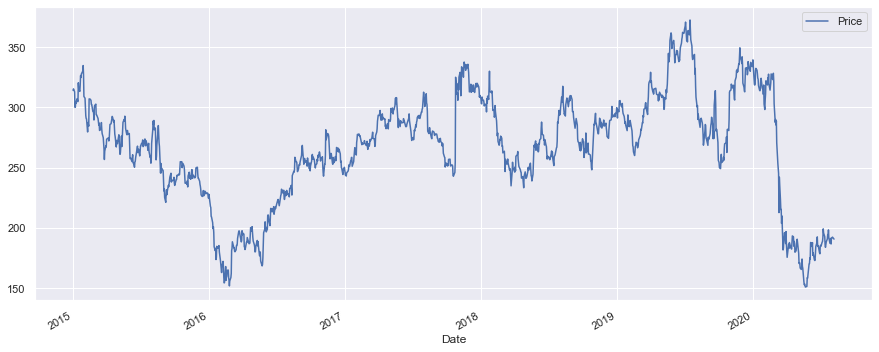

In [117]:
sbi.plot(figsize=(15, 6))

In [118]:
sbi['month']=sbi.index.month
sbi['year']=sbi.index.year
sbi

,Price,month,year
Date,,,
2015-01-01,314.00,1,2015
2015-01-02,315.25,1,2015
2015-01-05,312.75,1,2015
2015-01-06,299.90,1,2015
2015-01-07,300.15,1,2015
...,...,...,...
2020-08-03,192.25,8,2020
2020-08-04,191.60,8,2020
2020-08-05,191.45,8,2020


In [119]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1385 entries, 2015-01-01 to 2020-08-07
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1385 non-null   float64
 1   month   1385 non-null   int64  
 2   year    1385 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 43.3 KB


In [120]:
#Average Monthly Stocks Price
month_sbi=df.pivot_table(values='Price',index=[df['Date'].dt.year,df['Date'].dt.month])
print(month_sbi.shape)
month_sbi.head(28)

(68, 1)


Price
Date Date            
2015 1     314.902381
     2     296.115000
     3     281.002381
     4     279.800000
     5     277.922500
     6     260.229545
     7     266.926087
     8     268.185714
     9     234.717500
     10    245.530000
     11    242.628947
     12    232.109091
2016 1     195.842500
     2     161.923810
     3     186.602500
     4     190.850000
     5     182.988636
     6     210.304545
     7     226.597500
     8     242.052273
     9     255.657500
     10    257.268421
     11    261.307143
     12    256.340909
2017 1     252.897619
     2     272.478947
     3     275.254545
     4     288.886111

<a id='Sampling'></a>
## 4.2 Samplimg

In [121]:
sbi.Price.resample('MS').agg(['min','max', 'mean','sum'])

,min,max,mean,sum
Date,,,,
2015-01-01,299.90,334.60,314.902381,6612.95
2015-02-01,279.50,307.50,296.115000,5922.30
2015-03-01,256.65,302.60,281.002381,5901.05
2015-04-01,267.05,292.40,279.800000,5316.20
2015-05-01,260.95,292.60,277.922500,5558.45
...,...,...,...,...
2020-04-01,175.50,193.25,185.833333,3345.00
2020-05-01,150.85,178.85,162.755263,3092.35
2020-06-01,170.05,192.45,180.377273,3968.30


In [122]:
# Resampling for Average monthly stock price
y=sbi['Price'].resample('MS').mean()
y.head(50)

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
2015-06-01    260.229545
2015-07-01    266.926087
2015-08-01    268.185714
2015-09-01    234.717500
2015-10-01    245.530000
2015-11-01    242.628947
2015-12-01    232.109091
2016-01-01    195.842500
2016-02-01    161.923810
2016-03-01    186.602500
2016-04-01    190.850000
2016-05-01    182.988636
2016-06-01    210.304545
2016-07-01    226.597500
2016-08-01    242.052273
2016-09-01    255.657500
2016-10-01    257.268421
2016-11-01    261.307143
2016-12-01    256.340909
2017-01-01    252.897619
2017-02-01    272.478947
2017-03-01    275.254545
2017-04-01    288.886111
2017-05-01    295.136364
2017-06-01    285.483333
2017-07-01    289.345238
2017-08-01    288.376190
2017-09-01    268.014286
2017-10-01    267.302500
2017-11-01    327.336364
2017-12-01    315.342500
2018-01-01    307.663636
2018-02-01    282.592105
2018-03-01    251.665789
2018-04-01    248.67

<AxesSubplot:xlabel='Date'>

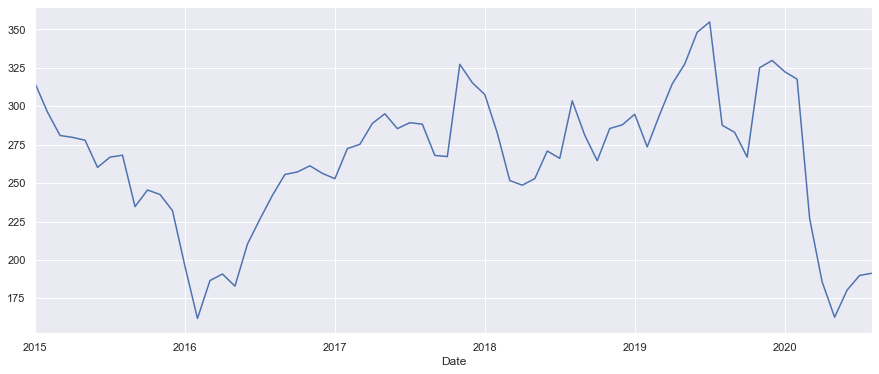

In [123]:
y.plot(figsize=(15, 6))

<a id='Decomposition'></a>
## 4.2 Decomposition

Decomposing the time series into three distinct components: trend, seasonality, and noise.

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

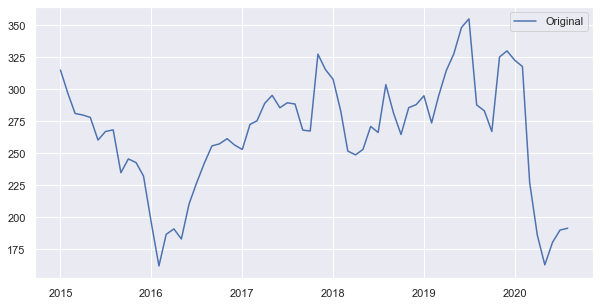

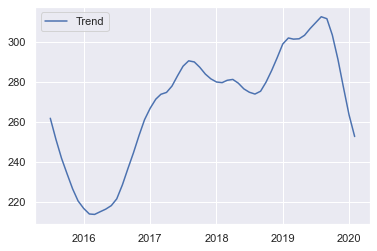

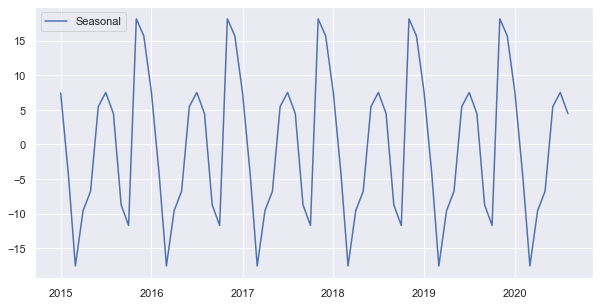

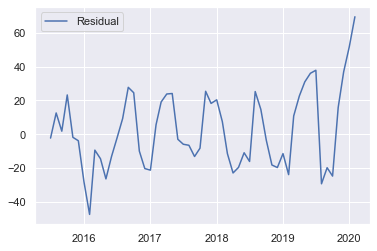

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.figure(figsize=(10,5))
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

so We see that seasonality is present in our  stocks data

<table align="left">
    <tr>
        <td width="8%">
            <img src="0.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The plot clearly indicates that the time series has seasonality pattern.The stock prices are always high at the beginning of the year and high but slightly down trend at the end of the year. There is always an upward trend within any single year with a couple of low months after start the year and when approching end of the year</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Checking_Stationarity"></a>
## 4.3 Checking Stationarity

## ADF Test

Our first step in time-series analysis should be to check whether
there is any evidence of a trend or seasonal effects and, if there is, remove them.
Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test
to check whether your time series is stationary or non-stationary. It uses an autoregressive
model and optimizes an information criterion across multiple different lag values.


**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [127]:
from statsmodels.tsa.stattools import adfuller

In [128]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('Sbi stocks Price.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.460279
p-value: 0.125440
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


**So by this statistical test we say p-value of 0.12 is greater than 0.05 so we accept the Null hypothesis or 
also  statistical value of -2.46 is greater than 1% critical value of -3.534 so we accept the Null Hypothresis
so this Series is not Stationary**

### KPSS Test

**Null Hypothesis: The series has no  unit root ( stationary)**

**Alternate Hypothesis: The series has no unit root (not stationary)**

In [129]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import kpss
print('Results of KPSS Test:')
kpsstest = kpss(y, regression='c', nlags=1)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print(kpss_output)

Results of KPSS Test:
Test Statistic           0.388692
p-value                  0.082029
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


So here P-value of 0.08 is greater than 0.05 confidence value so we accep the null hypothesis

#### 1.  Log Transformation

In [130]:
# Original data before transformation
y_original=y

In [131]:
# if the data is not stationary we can make use of two methods to make it stationary
# 1.  log transformation 
# 2. differencing


# code


y = np.log(y)
result = adfuller(y ) # code for  log transformation
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -2.410727
p-value: 0.138732
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


<AxesSubplot:xlabel='Date'>

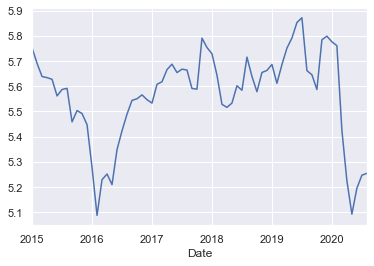

In [197]:
y.plot()

In [132]:
y.head()

Date
2015-01-01    5.752263
2015-02-01    5.690748
2015-03-01    5.638363
2015-04-01    5.634075
2015-05-01    5.627342
Freq: MS, Name: Price, dtype: float64

#### 2.  Differencing

In [133]:
'''

y=y.diff()[1:] # differencing code
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

'''

"\n\ny=y.diff()[1:] # differencing code\nresult = adfuller(y)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n\n"

In [124]:
'''''[fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))


for variable, subplot in zip(y, ax.flatten()):
    
    
    lag_plot(dfInput[variable], ax = subplot)


plt.title('SBI Autocorrelation plot')]'''''

"''[fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))\n\n\nfor variable, subplot in zip(y, ax.flatten()):\n    \n    \n    lag_plot(dfInput[variable], ax = subplot)\n\n\nplt.title('SBI Autocorrelation plot')]"

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [134]:
p = d = q = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [135]:
result_dict = {}
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:422.15120778308534
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:302.0706060897905
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19.81866010862017
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-4.64902386066349
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23.39433953211323
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1.1403045627959383
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-7.6563368721284135
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-4.626174512135579
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:331.5216096374912
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:228.15630454796133
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-34.341727672019594
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-38.1822414530428
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-27.923698927918778
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-44.31739270659311
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-43.13025724260881
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-38.84616357303541
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-125.45332944330865
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-100.01308731

In [136]:
len(result_dict)

38

In [212]:
print(sorted(result_dict.keys()))
result_dict[-100]

[-126.0, -125.0, -124.0, -123.0, -121.0, -100.0, -99.0, -98.0, -97.0, -96.0, -95.0, -73.0, -72.0, -71.0, -70.0, -69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -44.0, -43.0, -39.0, -38.0, -34.0, -28.0, -8.0, -5.0, 1.0, 20.0, 23.0, 228.0, 302.0, 332.0, 422.0]


'(1, 1, 1)(1, 0, 0, 12)'

**We are selecting those parameter which has minimum AIC score**

<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the ARIMA model

In [213]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1768      0.107      1.657      0.098      -0.032       0.386
ar.S.L12      -0.1248      0.153     -0.813      0.416      -0.425       0.176
sigma2         0.0080      0.001      7.531      0.000       0.006       0.010


**Running model diagnostiscs to check any unusual behaviour**
<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

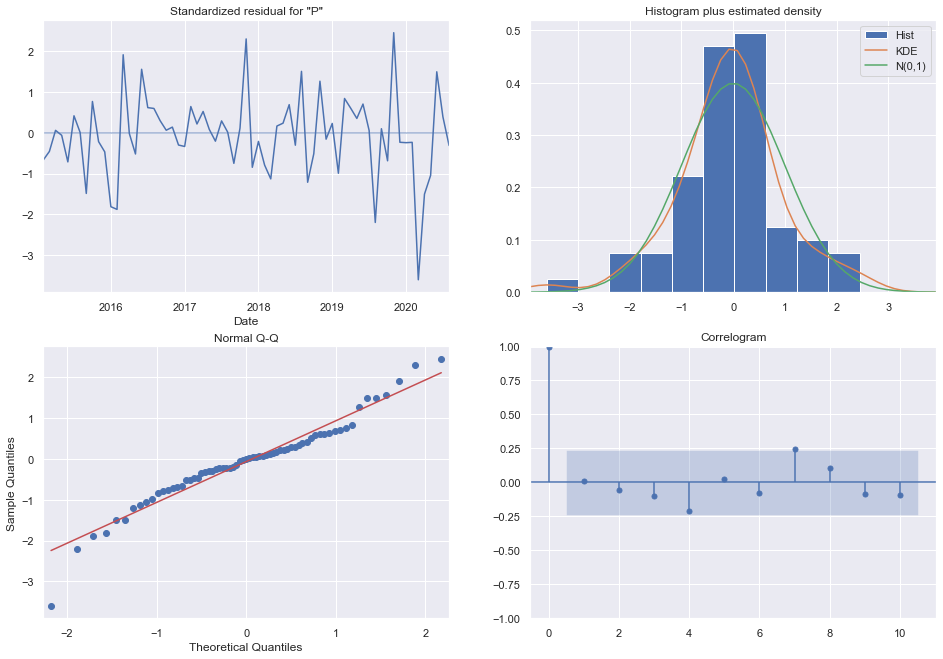

In [214]:
results.plot_diagnostics(figsize=(16, 11))
plt.show()

**The model diagnostics indicates that the model residuals are near normally distributed**

<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

**We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts**

In [215]:
y.tail()

Date
2020-04-01    5.224850
2020-05-01    5.092248
2020-06-01    5.195051
2020-07-01    5.246646
2020-08-01    5.254261
Freq: MS, Name: Price, dtype: float64

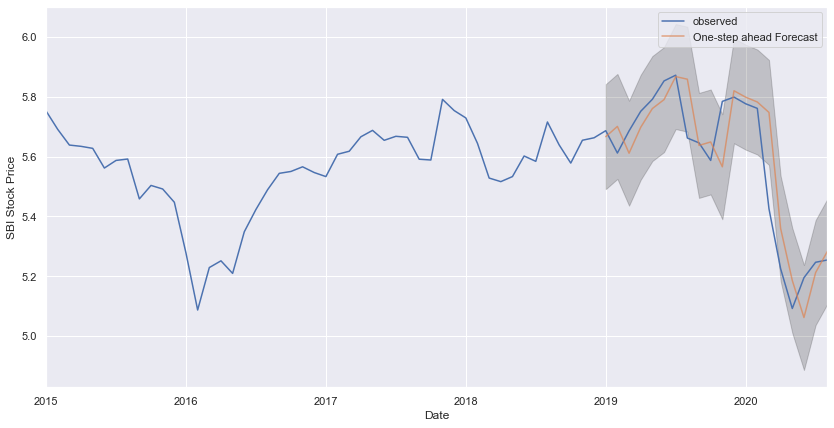

In [216]:
#set forecasts to start at 2019–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')


pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SBI Stock Price')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE


In [217]:
pred.conf_int()

,lower Price,upper Price
Date,,
2019-01-01,5.490985,5.841802
2019-02-01,5.525247,5.876064
2019-03-01,5.435691,5.786508
2019-04-01,5.522351,5.873168
2019-05-01,5.584949,5.935766
2019-06-01,5.614837,5.965654
2019-07-01,5.691848,6.042665
2019-08-01,5.683003,6.033819
2019-09-01,5.461731,5.812548


In [218]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.01
The Root Mean Squared Error of our forecasts is 0.11


**MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily Stock Prices in the test set within 0.12 of the real stock prices**

### R2_Score of our forecast

In [219]:
from sklearn.metrics import r2_score
r2_score(y_forecasted,  y_truth)

0.7692294854395396

<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


plot(forecast(auto.arima(ts(temps,frequency=365),D=1),h=365))

            lower Price  upper Price
2020-09-01     5.077590     5.428407
2020-10-01     4.988845     5.530622
2020-11-01     4.891087     5.578948
2020-12-01     4.828723     5.637691
2021-01-01     4.778819     5.693149
2021-02-01     4.733520     5.742292
2021-03-01     4.732218     5.827322
2021-04-01     4.717232     5.892342
2021-05-01     4.696326     5.946334
2021-06-01     4.648173     5.968836
2021-07-01     4.608205     5.995931
2021-08-01     4.575271     6.026965
2021-09-01     4.550666     6.051885
2021-10-01     4.526800     6.074070
2021-11-01     4.507685     6.099352
2021-12-01     4.486343     6.121146
2022-01-01     4.464987     6.141809
2022-02-01     4.444253     6.162063
2022-03-01     4.419014     6.176857
2022-04-01     4.396322     6.193307
2022-05-01     4.375105     6.210396
2022-06-01     4.357943     6.230758
2022-07-01     4.340353     6.249954
2022-08-01     4.322426     6.268118


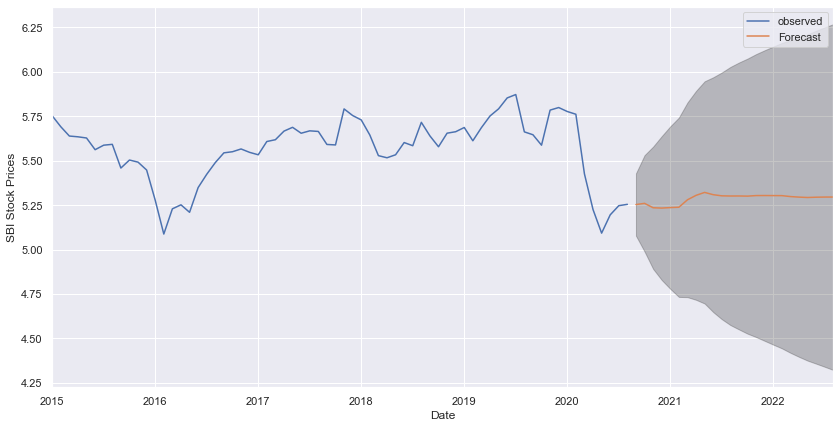

In [220]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SBI Stock Prices')
print(pred_ci)
plt.legend()
plt.show()

<a id="Conclusion"> </a>
# 6 Conclusion

**We observe that Prices of SBI Stocks produces seasonal pattern. Early of the year is in season for Stocks investments in the SBI. The Stock Prices decreases linearly over time and again toward the end of the season and in coming years it saturates .**